In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv('train.csv')

In [ ]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
gender = df1["Sex"]

In [ ]:
import seaborn as sns

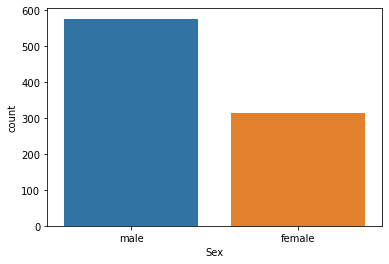

In [ ]:
sns.countplot(gender)

In [ ]:
df1.drop(['PassengerId',"Name","Ticket","Embarked","SibSp","Parch"], axis=1, inplace=True)

In [ ]:
df1.head()

,Survived,Pclass,Sex,Age,Fare,Cabin
0,0,3,male,22.0,7.2500,NaN
1,1,1,female,38.0,71.2833,C85
2,1,3,female,26.0,7.9250,NaN
3,1,1,female,35.0,53.1000,C123
4,0,3,male,35.0,8.0500,NaN


In [ ]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Cabin       687
dtype: int64

In [ ]:
df1['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

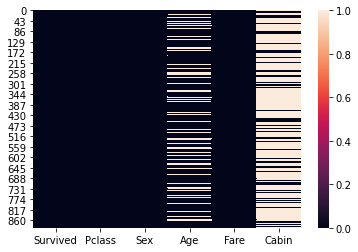

In [ ]:
# It is very difficult to judge which data is empty or not so we are using the graph plottaion which is easy to see in graph
sns.heatmap(df1.isnull())

In [ ]:
# function helps you to put the average value 

def fill_age(cols) :
    Pclass=cols[0]
    age=cols[1]
    if pd.isnull(age) :
        if Pclass==1 :
            return 38
        elif Pclass==2 :
            return 28
        elif Pclass==3 :
            return 25 
        else :
            return 30
    else:
        return age

In [ ]:
# now the function apply the whole data with columns wise 
age= df1[ ["Pclass","Age" ] ].apply(fill_age,axis=1)

In [ ]:
df1['Age'] = age

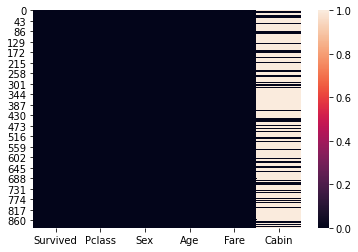

In [ ]:
# It is very difficult to judge which data is empty or not so we are using the graph plottaion which is easy to see in graph
sns.heatmap(df1.isnull())

In [ ]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Cabin       687
dtype: int64

In [ ]:
#as cabin has more empty fields...we will neglect this feature

In [ ]:
df1.drop('Cabin',axis=1,inplace=True)
# axis = 1 (columns)
# axis = 0 (rows)
# implace = True ( it replace the original data means replace the previus data )

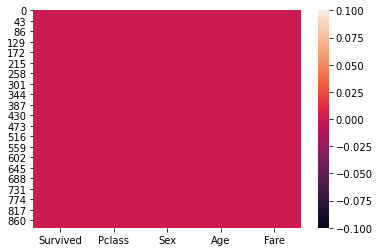

In [ ]:
# Now the data have only some empty feature places
sns.heatmap(df1.isnull())

In [ ]:
sex = pd.get_dummies(df1['Sex'], drop_first=True)

In [ ]:
df1.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [ ]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
df1 = pd.concat([df1,sex], axis = 1)

In [ ]:
df1.head()

,Survived,Pclass,Sex,Age,Fare,male
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


In [ ]:
df1.drop(['Sex'], axis=1, inplace=True)

In [ ]:
df1.head()

,Survived,Pclass,Age,Fare,male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [ ]:
Pclass = pd.get_dummies(df1["Pclass"], drop_first = True)

In [ ]:
Pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [ ]:
df1 = pd.concat([df1,Pclass],axis=1)

In [ ]:
df1

,Survived,Pclass,Age,Fare,male,2,3
0,0,3,22.0,7.2500,1,0,1
1,1,1,38.0,71.2833,0,0,0
2,1,3,26.0,7.9250,0,0,1
3,1,1,35.0,53.1000,0,0,0
4,0,3,35.0,8.0500,1,0,1
...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,1,0
887,1,1,19.0,30.0000,0,0,0
888,0,3,25.0,23.4500,0,0,1
889,1,1,26.0,30.0000,1,0,0


In [ ]:
df1.drop(['Pclass'],axis=1, inplace=True)

In [ ]:
df1.head()

,Survived,Age,Fare,male,2,3
0,0,22.0,7.2500,1,0,1
1,1,38.0,71.2833,0,0,0
2,1,26.0,7.9250,0,0,1
3,1,35.0,53.1000,0,0,0
4,0,35.0,8.0500,1,0,1


In [ ]:
#feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()

In [ ]:
feat_scale = ['Age', 'Fare']
df1[feat_scale] = SC.fit_transform(df1[feat_scale])

In [ ]:
df1.head()

,Survived,Age,Fare,male,2,3
0,0,-0.548295,-0.502445,1,0,1
1,1,0.663345,0.786845,0,0,0
2,1,-0.245385,-0.488854,0,0,1
3,1,0.436162,0.420730,0,0,0
4,0,0.436162,-0.486337,1,0,1


In [ ]:
X_train = df1.drop(['Survived'], axis=1)
y_train = df1['Survived']

In [ ]:
X_train.head()

,Age,Fare,male,2,3
0,-0.548295,-0.502445,1,0,1
1,0.663345,0.786845,0,0,0
2,-0.245385,-0.488854,0,0,1
3,0.436162,0.420730,0,0,0
4,0.436162,-0.486337,1,0,1


In [ ]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
## Now we will import the the binarry classification algorithm
from sklearn.linear_model import LogisticRegression
# created by empty mind 
mind=LogisticRegression()
# Now trained the model
mind.fit(X_train,y_train)

LogisticRegression()

In [ ]:
df2 = pd.read_csv("test.csv")

In [ ]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df3 = df2.drop(['PassengerId','Name','Ticket','Cabin','Embarked','SibSp','Parch'], axis=1)

In [ ]:
df3.head()

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875


In [ ]:
df3.isnull().sum()

Pclass     0
Sex        0
Age       86
Fare       1
dtype: int64

In [ ]:
df3['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [ ]:
# function helps you to put the average value 

def fill_age(cols) :
    Pclass=cols[0]
    age=cols[1]
    if pd.isnull(age) :
        if Pclass==1 :
            return 38
        elif Pclass==2 :
            return 28
        elif Pclass==3 :
            return 25 
        else :
            return 30
    else:
        return age

In [ ]:
# now the function apply the whole data with columns wise 
age= df3[ ["Pclass","Age" ] ].apply(fill_age,axis=1)

In [ ]:
df3['Age'] = age

In [ ]:
df3['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    25.0
414    39.0
415    38.5
416    25.0
417    25.0
Name: Age, Length: 418, dtype: float64

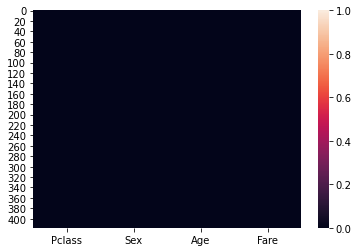

In [ ]:
# It is very difficult to judge which data is empty or not so we are using the graph plottation which is easy to see in graph
import seaborn as sns
sns.heatmap(df3.isnull())

In [ ]:
df3.head()

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875


In [ ]:
sex = pd.get_dummies(df3['Sex'], drop_first=True)

In [ ]:
df3 = pd.concat([df3,sex], axis = 1)

In [ ]:
df3.head()

,Pclass,Sex,Age,Fare,male
0,3,male,34.5,7.8292,1
1,3,female,47.0,7.0000,0
2,2,male,62.0,9.6875,1
3,3,male,27.0,8.6625,1
4,3,female,22.0,12.2875,0


In [ ]:
df3.drop(['Sex'],axis=1, inplace=True)

In [ ]:
df3.head()

,Pclass,Age,Fare,male
0,3,34.5,7.8292,1
1,3,47.0,7.0000,0
2,2,62.0,9.6875,1
3,3,27.0,8.6625,1
4,3,22.0,12.2875,0


In [ ]:
Pclass = pd.get_dummies(df3["Pclass"], drop_first = True)

In [ ]:
df3 = pd.concat([df3,Pclass],axis=1)

In [ ]:
df3.head()

,Pclass,Age,Fare,male,2,3
0,3,34.5,7.8292,1,0,1
1,3,47.0,7.0000,0,0,1
2,2,62.0,9.6875,1,1,0
3,3,27.0,8.6625,1,0,1
4,3,22.0,12.2875,0,0,1


In [ ]:
df3.drop(['Pclass'],axis=1, inplace=True)

In [ ]:
df3.head()

,Age,Fare,male,2,3
0,34.5,7.8292,1,0,1
1,47.0,7.0000,0,0,1
2,62.0,9.6875,1,1,0
3,27.0,8.6625,1,0,1
4,22.0,12.2875,0,0,1


In [ ]:
feat_scale = ['Age', 'Fare']
df3[feat_scale] = SC.fit_transform(df3[feat_scale])

In [ ]:
df3.head()

,Age,Fare,male,2,3
0,0.389213,-0.497811,1,0,1
1,1.362944,-0.512660,0,0,1
2,2.531421,-0.464532,1,1,0
3,-0.195026,-0.482888,1,0,1
4,-0.584518,-0.417971,0,0,1


In [ ]:
df3['Fare'].fillna(df3['Fare'].mean(), inplace=True)

In [ ]:
df3.isnull().sum()

Age     0
Fare    0
male    0
2       0
3       0
dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = mind.predict(df3)
#y_test_true = y_test


In [ ]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
submission = pd.DataFrame({
    "PassengerId" : df2["PassengerId"],
    "Survived" : y_pred
})

In [ ]:
submission.to_csv("titanic_submission1.csv", index=False)